#### CSML1020 Course Project - New Plant Diseases Dectection
#### Authors (Group 3): Paul Doucet, Jerry Khidaroo

#### Initilization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

In [2]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

#### Data Preparation

In [4]:
# List of all directories and file counts in given path
def getDirCounts(dirName):
    listOfFile = os.listdir(dirName)
    rows = []
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            fields = entry.split("___")
            if fields[1] == 'healthy':
                status = 'healthy'
            else:
                status = "unhealthy"
            
            disease = fields[1].split("_")[-1].replace(")","").lower()
            
            noOfFiles = sum([len(files) for r, d, files in os.walk(fullPath)])
            rows.append([fields[0], fields[1], noOfFiles, status, disease])

    df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])
    #df['plant_status'] = df['plant'] + ' - ' + df['status']
    return df

In [5]:
dataDirTrain = '../NewPlantDiseasesDataset/train'
dataDirValidate = '../NewPlantDiseasesDataset/valid'
dataDirTest = '../NewPlantDiseasesDataset/test'

In [6]:
# Get the list of all files in directory tree at given path
plants_df = getDirCounts(dataDirTrain)
plants_df

,plant,condition,count,status,disease
0,Apple,Apple_scab,2016,unhealthy,scab
1,Apple,Black_rot,1987,unhealthy,rot
2,Apple,Cedar_apple_rust,1760,unhealthy,rust
3,Apple,healthy,2008,healthy,healthy
4,Blueberry,healthy,1816,healthy,healthy
5,Cherry_(including_sour),healthy,1826,healthy,healthy
6,Cherry_(including_sour),Powdery_mildew,1683,unhealthy,mildew
7,Corn_(maize),Cercospora_leaf_spot_Gray_leaf_spot,1642,unhealthy,spot
8,Corn_(maize),Common_rust,1907,unhealthy,rust
9,Corn_(maize),healthy,1859,healthy,healthy


#### Data Exploration

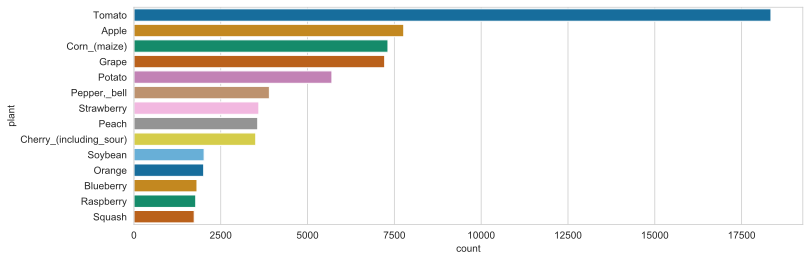

In [7]:
# number of images by plant
plant_images_sum_df = plants_df.groupby(by=['plant'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

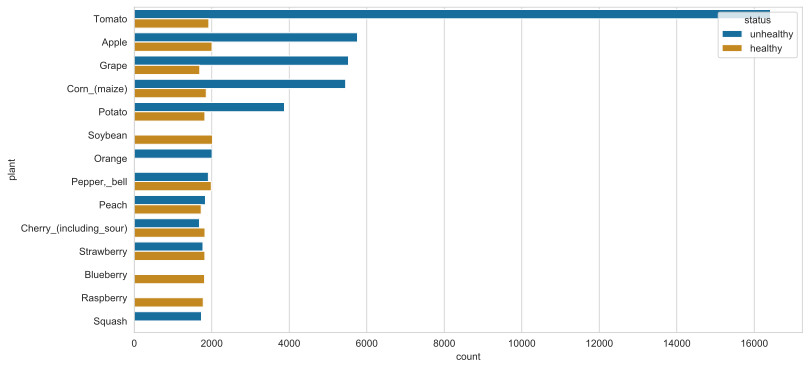

In [8]:
# number of images by plant (healthy and healthy)
plant_status_images_sum_df = plants_df.groupby(by=['plant','status'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 6), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_status_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='status', ax=ax1);

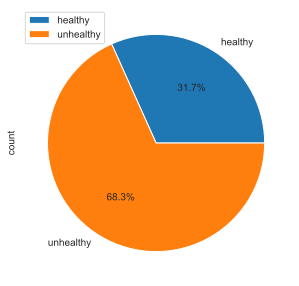

In [9]:
# Relative image percentages by health status
status_images_sum_df = plants_df.groupby(by=['status'], as_index=False)[plants_df.columns[:-2]].sum()
plot = status_images_sum_df.plot.pie(y='count', labels=status_images_sum_df['status'], autopct='%1.1f%%',  figsize=(5, 5))

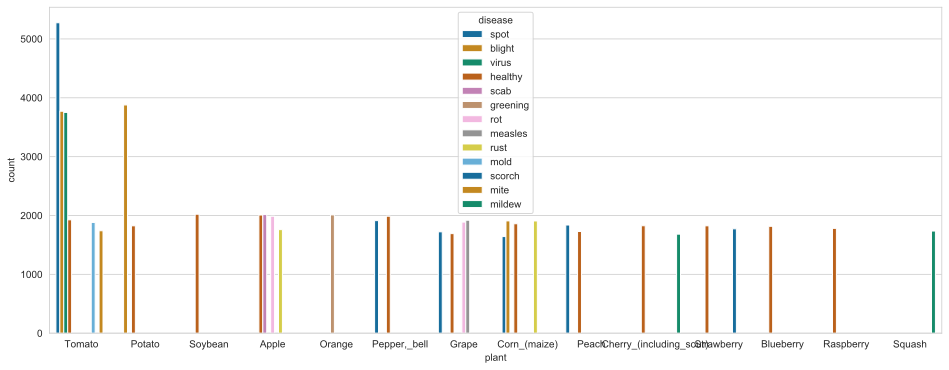

In [10]:
# number of images by plant per disease
plant_diseases_images_sum_df = plants_df.groupby(by=['plant','disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(16, 6), ncols=1, sharex=True)
sns.barplot(y='count', x='plant', data=plant_diseases_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='disease', ax=ax1);

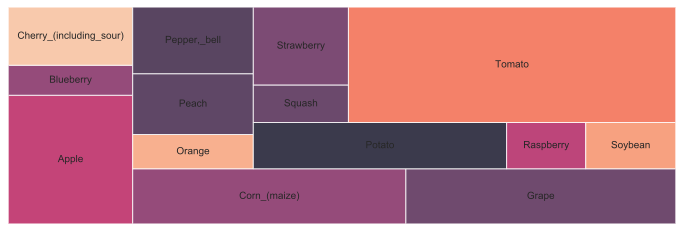

In [11]:
# Relative size visualization of images by plant
import squarify

fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
squarify.plot(sizes=plant_images_sum_df['count'], label=plant_images_sum_df['plant'], alpha=.8, ax=ax1)
plt.axis('off')
plt.show()

In [12]:
# Relative size visualization of images by plant disease
import plotly.express as px

plant_diseases_images_sum_df["plants"] = "plants" # in order to have a single root node
fig = px.treemap(plant_diseases_images_sum_df, path=['plants', 'plant', 'disease'], values='count',
                  color='disease', 
                  hover_data=['disease'],
                  range_color=[0.5, 8.5],
                  color_discrete_map={'(?)':'black', 'healthy':'lightgreen', 'blight':'darkblue', 'greening':'green', 'measles':'purple', 'mildew':'cyan', 'mite':'lightblue', 'mold':'pink', 'rot':'gold', 'rust':'darkred', 'scab':'darkgrey', 'scorch':'yellow', 'spot':'lightgray', 'virus':'red'},
                #   color_continuous_scale='RdBu_R',
                  width=1200, height=600
                  )

fig.show()

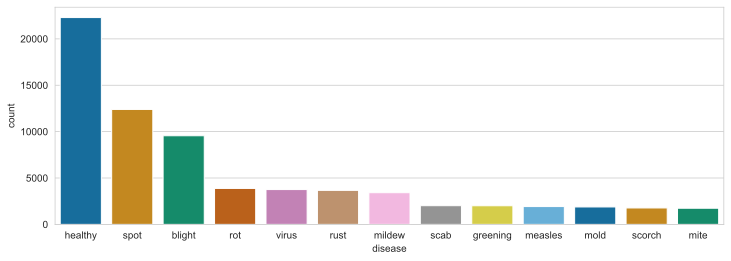

In [13]:
# number of images by disease
disease_images_sum_df = plants_df.groupby(by=['disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='count', x='disease', data=disease_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

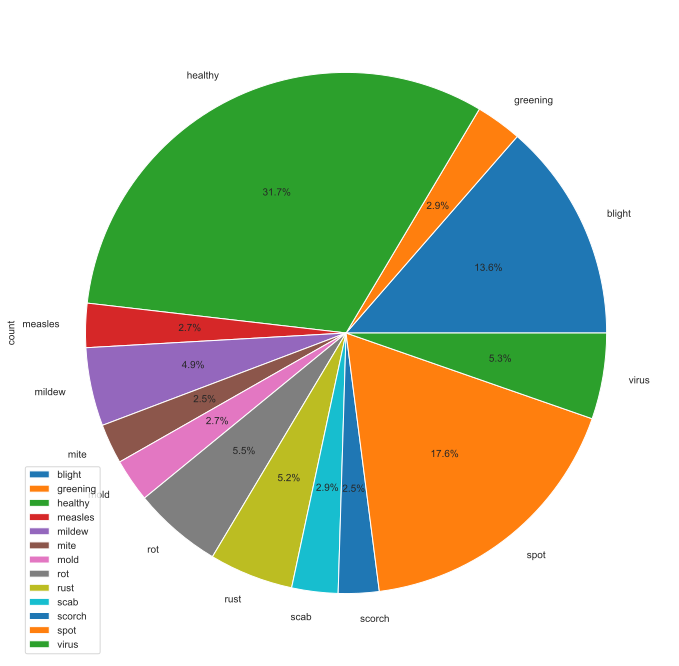

In [14]:
# Relative image percentages by disease
plot = disease_images_sum_df.plot.pie(y='count', labels=disease_images_sum_df['disease'], autopct='%1.1f%%',  figsize=(12, 12))

In [15]:
import tensorflow as tf


In [16]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
for physical_device in physical_devices:
    tf.config.experimental.set_memory_growth(physical_device, True)

In [17]:
from keras.applications.vgg16 import VGG16
import keras
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# batch_size = 128
batch_size = 48
training_set = train_datagen.flow_from_directory(dataDirTrain,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(dataDirValidate,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [19]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato_

In [20]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot', 'Corn_(maize)___Common_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites_Two-spotted_spider_mite', 'Tomato___Target_Spo

In [21]:
train_num = training_set.samples
valid_num = valid_set.samples

## Model Preparation

In [22]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

In [23]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                953382    
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
#fitting images to CNN
history = classifier.fit(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=3,
                         validation_steps=valid_num//batch_size,
                         )

Epoch 1/3
1464/1464 [==============================] - 3496s 2s/step - loss: 0.7539 - accuracy: 0.7788 - val_loss: 0.6955 - val_accuracy: 0.8621
Epoch 2/3
1464/1464 [==============================] - 1060s 724ms/step - loss: 0.5001 - accuracy: 0.8609 - val_loss: 0.3460 - val_accuracy: 0.9044
Epoch 3/3
1464/1464 [==============================] - 801s 547ms/step - loss: 0.4729 - accuracy: 0.8750 - val_loss: 0.4428 - val_accuracy: 0.8948


In [26]:
#Saving our model
filepath="./Mymodel.h5"
classifier.save(filepath)

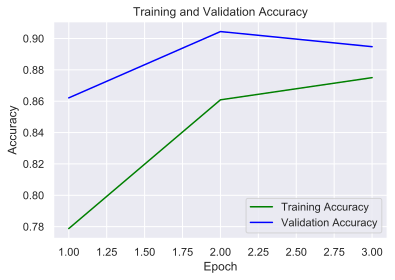

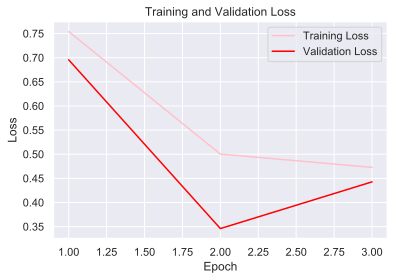

In [27]:
# import matplotlib.pyplot as plt
# import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:


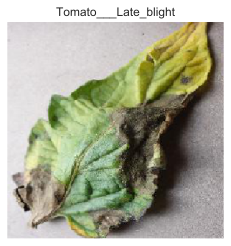

In [28]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../NewPlantDiseasesDataset/test/Tomato_Late_blight01.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()